Obervations:
1. According to the box plot, the top 4 most promising treatments had practically no outliers. Only Infubinol had a single outlier.
2. The two treatments which reduced tumors the most, Capomulin and Ramicane, also had the most data points, increasing the reliability of both studies beyond their reduction of tumor sizes alone. 
3. As a baseline, there was a strong correlaion between mouse weight and tumor size for the population treated with Capomulin. While the treatment was effective, weight was also a factor in determining tumor size. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress    

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen 

tumorvol_mean = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumorvol_median = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumorvol_variance = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumorvol_std = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumorvol_SEM = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumorvol_summary_df = pd.DataFrame({"Tumor Volume: mean":tumorvol_mean, "Tumor Volume: median":tumorvol_median,
    "Tumor Volume: variance": tumorvol_variance ,"Tumor Volume: standard deviation": tumorvol_std,
    "Tumor Volume: SEM": tumorvol_SEM})
tumorvol_summary_df

,Tumor Volume: mean,Tumor Volume: median,Tumor Volume: variance,Tumor Volume: standard deviation,Tumor Volume: SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

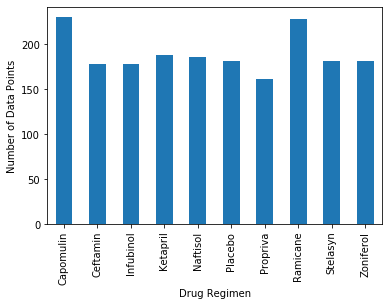

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints_per_regimen = mouse_study.groupby(["Drug Regimen"])["Drug Regimen"].count()
datapoints_bar = datapoints_per_regimen.plot(kind="bar")
datapoints_bar.set_ylabel("Number of Data Points")

Text(0.5, 0, 'Drug Regimen')

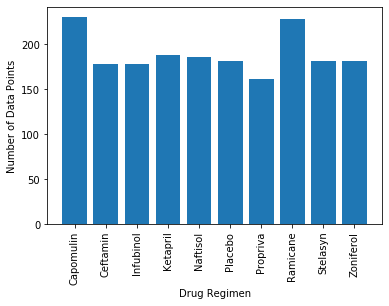

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 
regimens = ("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn",
    "Zoniferol")
plt.bar(regimens, datapoints_per_regimen, align="center")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

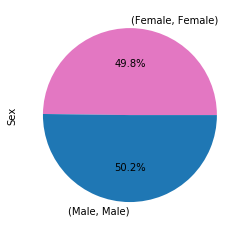

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = mouse_metadata.groupby(["Sex"])
mouse_gender_divide = mouse_gender["Sex"].value_counts()

mouse_gender_pie = mouse_gender_divide.plot(kind="pie", colors=["tab:pink", "tab:blue"], autopct="%1.1f%%")

# hot to get rid of the (female,female) thing to just Female?

<function matplotlib.pyplot.show(*args, **kw)>

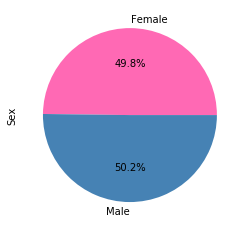

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_divide, explode=(0,0), labels = ["Female", "Male"], colors=["hotpink", "steelblue"],autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# mostpromisingtreatments = Capomulin, Ceftamin, Ramicane, Infubinol
regimen_cap = mouse_study.loc[mouse_study["Drug Regimen"]=="Capomulin",:]
regimen_cef = mouse_study.loc[mouse_study["Drug Regimen"]=="Ceftamin",:]
regimen_ram = mouse_study.loc[mouse_study["Drug Regimen"]=="Ramicane",:]
regimen_inf = mouse_study.loc[mouse_study["Drug Regimen"]=="Infubinol",:]

finalvol_cap = regimen_cap.groupby("Mouse ID").max()["Timepoint"]
finalvol_cap_col = pd.DataFrame(finalvol_cap)
finalvol_cap_df = pd.merge(finalvol_cap_col, mouse_study, on=("Mouse ID","Timepoint"),how="left")

finalvol_cef = regimen_cef.groupby("Mouse ID").max()["Timepoint"]
finalvol_cef_col = pd.DataFrame(finalvol_cef)
finalvol_cef_df = pd.merge(finalvol_cef_col, mouse_study, on=("Mouse ID","Timepoint"),how="left")

finalvol_ram = regimen_ram.groupby("Mouse ID").max()["Timepoint"]
finalvol_ram_col = pd.DataFrame(finalvol_ram)
finalvol_ram_df = pd.merge(finalvol_ram_col, mouse_study, on=("Mouse ID","Timepoint"),how="left")

finalvol_inf = regimen_inf.groupby("Mouse ID").max()["Timepoint"]
finalvol_inf_col = pd.DataFrame(finalvol_inf)
finalvol_inf_df = pd.merge(finalvol_inf_col, mouse_study, on=("Mouse ID","Timepoint"),how="left")

join_capcef = pd.DataFrame.append(finalvol_cap_df, finalvol_cef_df)
join_raminf = pd.DataFrame.append(finalvol_ram_df, finalvol_inf_df)
join_capceframinf = pd.DataFrame.append(join_capcef, join_raminf)
join_capceframinf.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [8]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

tumors_cap = finalvol_cap_df["Tumor Volume (mm3)"]
quartiles_cap = tumors_cap.quantile([.25, .5, .75])
lowerq_cap = quartiles_cap[.5]
upperq_cap = quartiles_cap[.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

tumors_cef = finalvol_cef_df["Tumor Volume (mm3)"]
quartiles_cef = tumors_cef.quantile([.25, .5, .75])
lowerq_cef = quartiles_cef[.5]
upperq_cef = quartiles_cef[.75]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

tumors_ram = finalvol_ram_df["Tumor Volume (mm3)"]
quartiles_ram = tumors_ram.quantile([.25, .5, .75])
lowerq_ram = quartiles_ram[.5]
upperq_ram = quartiles_ram[.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

tumors_inf = finalvol_inf_df["Tumor Volume (mm3)"]
quartiles_inf = tumors_inf.quantile([.25, .5, .75])
lowerq_inf = quartiles_inf[.5]
upperq_inf = quartiles_inf[.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

print(f"The lower and upper quartiles of Capomulin are: {lowerq_cap} and {upperq_cap} respectively.")
print(f"The interquartile range of Capomulin are: {iqr_cap}")
print(f"Values above {upper_bound_cap} and below {lower_bound_cap} could be outliers.")
print("------------------------------------------------------------------------------")
print(f"The lower and upper quartiles of Ceftamin are: {lowerq_cef} and {upperq_cef} respectively.")
print(f"The interquartile range of Ceftamin are: {iqr_cef}")
print(f"Values above {upper_bound_cef} and below {lower_bound_cef} could be outliers.")
print("------------------------------------------------------------------------------")
print(f"The lower and upper quartiles of Ramicane are: {lowerq_ram} and {upperq_ram} respectively.")
print(f"The interquartile range of Ramicane are: {iqr_ram}")
print(f"Values above {upper_bound_ram} and below {lower_bound_ram} could be outliers.")
print("------------------------------------------------------------------------------")
print(f"The lower and upper quartiles of Infubinol are: {lowerq_inf} and {upperq_inf} respectively.")
print(f"The interquartile range of Infubinol are: {iqr_inf}")
print(f"Values above {upper_bound_inf} and below {lower_bound_inf} could be outliers.")

The lower and upper quartiles of Capomulin are: 38.125164399999996 and 40.1592203 respectively.
The interquartile range of Capomulin are: 2.0340559000000056
Values above 43.21030415000001 and below 35.07408054999999 could be outliers.
------------------------------------------------------------------------------
The lower and upper quartiles of Ceftamin are: 59.85195552 and 64.29983003 respectively.
The interquartile range of Ceftamin are: 4.447874509999998
Values above 70.971641795 and below 53.180143755 could be outliers.
------------------------------------------------------------------------------
The lower and upper quartiles of Ramicane are: 36.56165229 and 40.65900627 respectively.
The interquartile range of Ramicane are: 4.097353980000001
Values above 46.805037240000004 and below 30.415621319999996 could be outliers.
------------------------------------------------------------------------------
The lower and upper quartiles of Infubinol are: 60.16518046 and 65.52574285 respecti

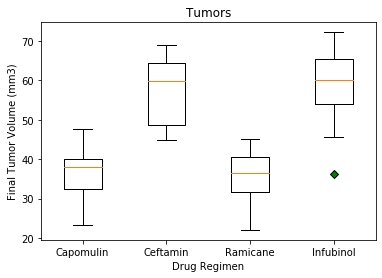

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_box_plot = [tumors_cap, tumors_cef, tumors_ram, tumors_inf]
green_diamond = dict(markerfacecolor='g', marker='D')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_box_plot, labels=["Capomulin","Ceftamin","Ramicane","Infubinol",], flierprops=green_diamond)

plt.show()

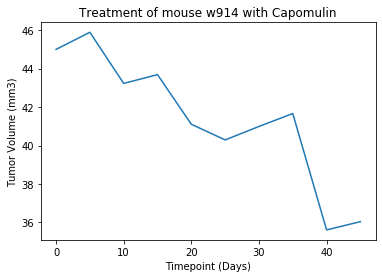

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# mouse 'w914'
capo_mouse = mouse_study.loc[mouse_study["Mouse ID"]=="w914",:]
x_axis = capo_mouse["Timepoint"]
y_axis = capo_mouse["Tumor Volume (mm3)"]

plt.title('Treatment of mouse w914 with Capomulin')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

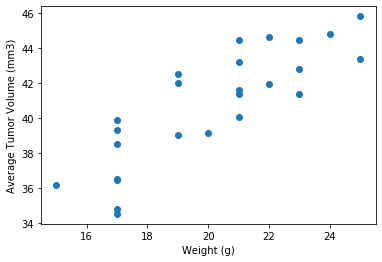

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 
capo_mice_avg = regimen_cap.groupby(["Mouse ID"]).mean()
plt.scatter(capo_mice_avg["Weight (g)"],capo_mice_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the
# Capomulin regimen

correlation = st.pearsonr(capo_mice_avg["Weight (g)"],capo_mice_avg["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


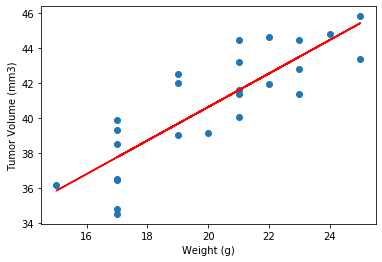

In [13]:
x_values = capo_mice_avg["Weight (g)"]
y_values = capo_mice_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()